Initial load

In [17]:
# In the terminal
# python -m venv .venv
# .\.venv\Scripts\activate
!pip install ipykernel
!pip install openai
!pip install python-dotenv
!pip install -U scikit-learn
!pip install matplotlib

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:05
    --------------------------------------- 0.2/10.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.6 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 2.7 MB/s eta 0:00:04
   -- ---------

Let's generate the embeddings

In [6]:
from dotenv import load_dotenv
import os

# Load variables from .env file
load_dotenv()

# Access the variables
openai_endpoint = os.environ.get('OPENAI_ENDPOINT')
openai_key = os.environ.get('OPENAI_KEY')

In [148]:
from openai import AzureOpenAI
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cityblock
from sklearn.metrics import jaccard_score
import numpy as np

print(openai_endpoint)

# Create an instance of the OpenAI client
openai_client = AzureOpenAI(
  api_key = openai_key,
  api_version = "2024-02-01",
  azure_endpoint = openai_endpoint
)

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai_client.embeddings.create(input = [text], model=model).data[0].embedding

def plot_graph(distances, title):
  # Graph
  max_value = max(distances) + 0.05

  x_values = [0] + distances + [max_value]
  y_values = [0] * len(x_values)
  c_values = ['k'] + ['b'] * len(distances) + ['k']

  # Define the x-axis positions and labels
  x_positions = [0, 1] + list(range(2, len(distances) + 2))
  x_labels = [item[1] for item in texts] + [max_value]

  plt.figure(figsize=(10, 2))  # Set the figure size
  plt.scatter(x_values, y_values, c=c_values)  # Plot the points
  plt.plot([0, max_value], [0, 0], 'k-')  # Draw a black line between the points (0, 0) and (1, 0)
  plt.yticks([])  # Hide the y-axis
  plt.xticks(x_values, x_labels, rotation='vertical')  # Label the x-axis with the names of the distances
  plt.title(title)  # Set the title of the plot
  plt.show()
  
def plot_similarities(texts):
  embeddings = []
  for item in texts:
      embedding = get_embedding(item[0])
      embeddings.append(np.array(embedding))


  first_embedding = np.array(embeddings[0]).reshape(1, -1)
  distances_cosin = []
  distances_eucl = []
  distances_manh = []
  distances_jacc = []
  distances_dot = []
  for embedding in embeddings[1:]:
      distances_eucl.append(np.linalg.norm(embeddings[0]-embedding))
      distances_cosin.append(1-cosine_similarity(first_embedding, np.array(embedding).reshape(1, -1))[0][0])
      distances_manh.append(cityblock(first_embedding.flatten(), embedding))
      # Convert embeddings to binary for Jaccard similarity
      bin_first_embedding = [1 if i > 0 else 0 for i in first_embedding.flatten()]
      bin_embedding = [1 if i > 0 else 0 for i in embedding]
      distances_jacc.append(jaccard_score(bin_first_embedding, bin_embedding))
      distances_dot.append(np.dot(first_embedding.flatten(), embedding))


  plot_graph(distances_cosin, "Cosine Similarity")
  plot_graph(distances_eucl, "Euclidean Distance")
  plot_graph(distances_manh, "Manhattan Distance")
  plot_graph(distances_jacc, "Jaccard Similarity")
  plot_graph(distances_dot, "Dots Product")




https://crgar-openai-openai-sw.openai.azure.com/


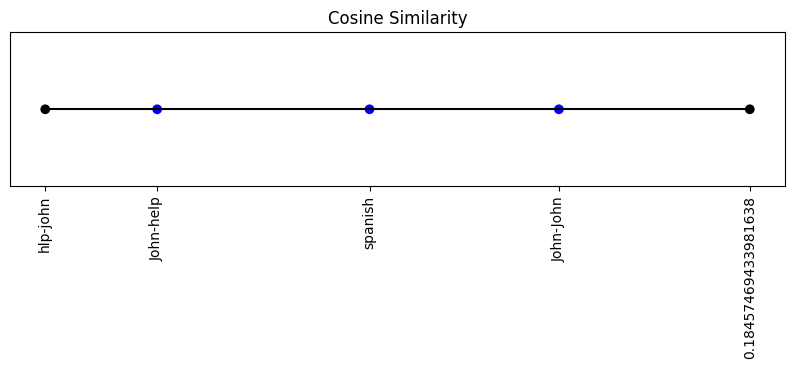

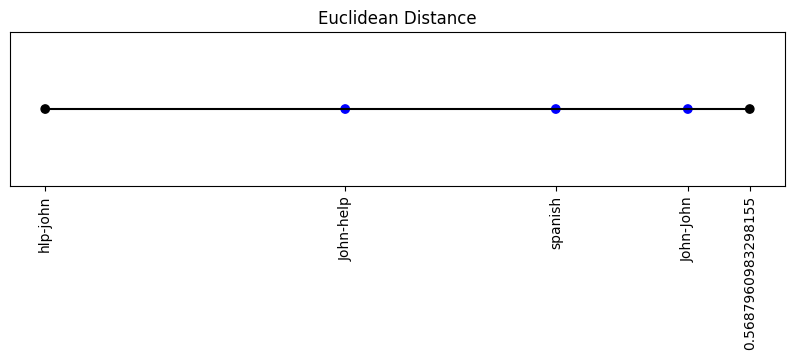

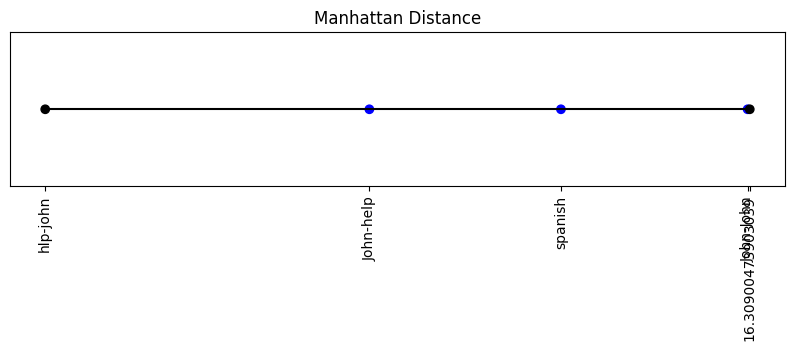

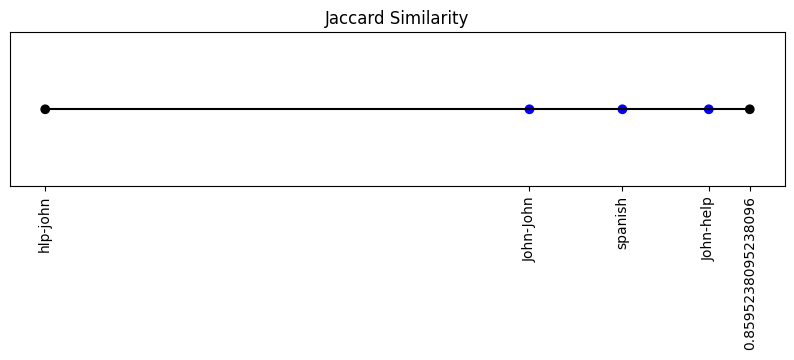

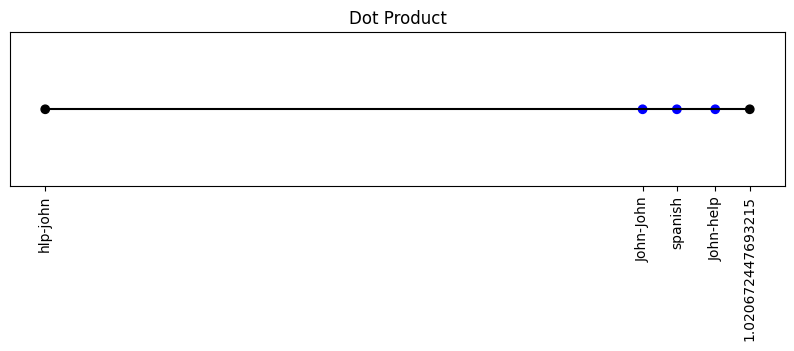

[0.9150404695148786, 0.9706724476932149, 0.8654253151861577]


In [154]:

texts = [
    #["He swung the bat hard, hoping to hit a home run.", "swung the bat"],
    ["Can you help John?", "hlp-john"],
    ["Puedes ayudar a John por favor?", "spanish"],
    ["John, can you help?", "John-help"],
    ["John John John John John John John", "John-John"],
]

plot_similarities(texts)


In [70]:
# Do it with cosine similarity:
embedding1 = get_embedding("He swung the bat hard, hoping to hit a home run.")
embedding2 = get_embedding("The bat flew silently through the night")
embedding3 = get_embedding("The crowd cheered as the baseball soared over the fence.")

# Convert the lists to numpy arrays
embedding1 = np.array(embedding1)
embedding2 = np.array(embedding2)
embedding3 = np.array(embedding3)

# Reshape the vectors to be 2D arrays
embedding1 = embedding1.reshape(1, -1)
embedding2 = embedding2.reshape(1, -1)
embedding3 = embedding3.reshape(1, -1)

# Compute the cosine similarity
similarity1 = cosine_similarity(embedding1, embedding2)
similarity2 = cosine_similarity(embedding1, embedding3)

print(similarity1)
print(similarity2)


[[0.8451678]]
[[0.87358776]]
